# Oregon Wildlife - Image Classification Capstone
## David Lappin
### BrainStation
#### 3/1/2023 -

## Model Optimization with Batch Normalization 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL 
from glob import glob

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#set local path to files for basic exploration

datapath = 'data/oregon_wildlife/' # This is the relative path to the data
image_files = os.listdir(datapath) #these are the individual folder names (the class names)

In [3]:
#define loading parameters 

batch_size = 32 
img_height = 160
img_width = 160

In [4]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
  datapath,
  validation_split=0.2,
  subset="training",
  label_mode='int',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13950 files belonging to 20 classes.
Using 11160 files for training.


In [5]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
  datapath,
  validation_split=0.2,
  subset="validation",
  label_mode='int',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13950 files belonging to 20 classes.
Using 2790 files for validation.


In [6]:
class_names = test_set.class_names
class_names

['bald_eagle',
 'black_bear',
 'bobcat',
 'canada_lynx',
 'columbian_black-tailed_deer',
 'cougar',
 'coyote',
 'deer',
 'elk',
 'gray_fox',
 'gray_wolf',
 'mountain_beaver',
 'nutria',
 'raccoon',
 'raven',
 'red_fox',
 'ringtail',
 'sea_lions',
 'seals',
 'virginia_opossum']

In [7]:
#adjust the prefetching for performance

AUTOTUNE = tf.data.AUTOTUNE #Autotune optimizes CPU uptime for each batch

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) #cache stores data in memory after 1st epoch for faster iterations
test_set = test_set.cache().prefetch(buffer_size=AUTOTUNE) #prefetch allows for overlapping 


In [8]:
# creates an augmentation sequence that can be used on a single example to create new variations

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [9]:
num_classes = len(class_names)
img_height = 160
img_width = 160

model = Sequential([
  
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  data_augmentation,  
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),  
  layers.MaxPooling2D(),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
   
    
  #Flatten  
  layers.Flatten(),
    
  #Dense Layers  
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),  
  layers.Dense(num_classes, activation = 'softmax')
])


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 160, 160, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)       

In [15]:
# set stopping criteria
callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.005, patience=5)

In [16]:
#Train 10 initial epochs and evaluate results

epochs = 200

history = model.fit(   
  train_set,            
  validation_data=test_set, 
  epochs=epochs,
  callbacks = [callbacks]  
)

Epoch 1/200


C:\Users\dlapp\anaconda3\envs\baseclone\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


349/349 [==============================] - 188s 463ms/step - loss: 3.0419 - accuracy: 0.0684 - val_loss: 4.9918 - val_accuracy: 0.0688
Epoch 2/200
349/349 [==============================] - 155s 445ms/step - loss: 2.9709 - accuracy: 0.0633 - val_loss: 2.8926 - val_accuracy: 0.0903
Epoch 3/200
349/349 [==============================] - 156s 446ms/step - loss: 2.8509 - accuracy: 0.0995 - val_loss: 2.7525 - val_accuracy: 0.1373
Epoch 4/200
349/349 [==============================] - 155s 445ms/step - loss: 2.7679 - accuracy: 0.1289 - val_loss: 2.6834 - val_accuracy: 0.1297
Epoch 5/200
349/349 [==============================] - 156s 447ms/step - loss: 2.7319 - accuracy: 0.1357 - val_loss: 2.8134 - val_accuracy: 0.1355
Epoch 6/200
349/349 [==============================] - 156s 447ms/step - loss: 2.7055 - accuracy: 0.1468 - val_loss: 2.6406 - val_accuracy: 0.1860
Epoch 7/200
349/349 [==============================] - 156s 448ms/step - loss: 2.6835 - accuracy: 0.1547 - val_loss: 2.6035 - val_

349/349 [==============================] - 155s 445ms/step - loss: 1.7040 - accuracy: 0.4450 - val_loss: 2.2615 - val_accuracy: 0.3738
Epoch 49/200
349/349 [==============================] - 156s 447ms/step - loss: 1.6779 - accuracy: 0.4524 - val_loss: 2.0571 - val_accuracy: 0.4072
Epoch 50/200
349/349 [==============================] - 156s 446ms/step - loss: 1.6501 - accuracy: 0.4579 - val_loss: 2.2436 - val_accuracy: 0.3864
Epoch 51/200
349/349 [==============================] - 156s 447ms/step - loss: 1.6263 - accuracy: 0.4715 - val_loss: 2.1670 - val_accuracy: 0.3771
Epoch 52/200
349/349 [==============================] - 156s 447ms/step - loss: 1.6151 - accuracy: 0.4699 - val_loss: 2.3465 - val_accuracy: 0.3724
Epoch 53/200
349/349 [==============================] - 157s 449ms/step - loss: 1.5868 - accuracy: 0.4805 - val_loss: 2.4029 - val_accuracy: 0.3649
Epoch 54/200
349/349 [==============================] - 156s 448ms/step - loss: 1.5483 - accuracy: 0.4966 - val_loss: 2.3279 

349/349 [==============================] - 165s 474ms/step - loss: 0.7519 - accuracy: 0.7575 - val_loss: 2.8969 - val_accuracy: 0.4240
Epoch 104/200
349/349 [==============================] - 164s 471ms/step - loss: 0.7387 - accuracy: 0.7598 - val_loss: 2.6785 - val_accuracy: 0.4616
Epoch 105/200
349/349 [==============================] - 164s 471ms/step - loss: 0.7410 - accuracy: 0.7599 - val_loss: 2.9686 - val_accuracy: 0.4233
Epoch 106/200
349/349 [==============================] - 164s 469ms/step - loss: 0.7233 - accuracy: 0.7587 - val_loss: 2.6291 - val_accuracy: 0.4839
Epoch 107/200
349/349 [==============================] - 162s 465ms/step - loss: 0.7136 - accuracy: 0.7707 - val_loss: 2.5048 - val_accuracy: 0.4609
Epoch 108/200
349/349 [==============================] - 163s 466ms/step - loss: 0.7034 - accuracy: 0.7698 - val_loss: 3.0246 - val_accuracy: 0.4341
Epoch 109/200
349/349 [==============================] - 164s 469ms/step - loss: 0.6861 - accuracy: 0.7780 - val_loss: 4

349/349 [==============================] - 160s 459ms/step - loss: 0.4115 - accuracy: 0.8691 - val_loss: 3.0974 - val_accuracy: 0.4588
Epoch 159/200
349/349 [==============================] - 160s 460ms/step - loss: 0.4299 - accuracy: 0.8624 - val_loss: 3.1356 - val_accuracy: 0.4452
Epoch 160/200
349/349 [==============================] - 160s 459ms/step - loss: 0.4027 - accuracy: 0.8677 - val_loss: 3.2394 - val_accuracy: 0.4713
Epoch 161/200
349/349 [==============================] - 160s 459ms/step - loss: 0.4009 - accuracy: 0.8711 - val_loss: 3.2447 - val_accuracy: 0.4566
Epoch 162/200
349/349 [==============================] - 160s 459ms/step - loss: 0.3932 - accuracy: 0.8756 - val_loss: 2.9469 - val_accuracy: 0.4932
Epoch 163/200
349/349 [==============================] - 159s 456ms/step - loss: 0.3979 - accuracy: 0.8677 - val_loss: 3.2499 - val_accuracy: 0.4688
Epoch 164/200
349/349 [==============================] - 157s 451ms/step - loss: 0.4083 - accuracy: 0.8675 - val_loss: 3

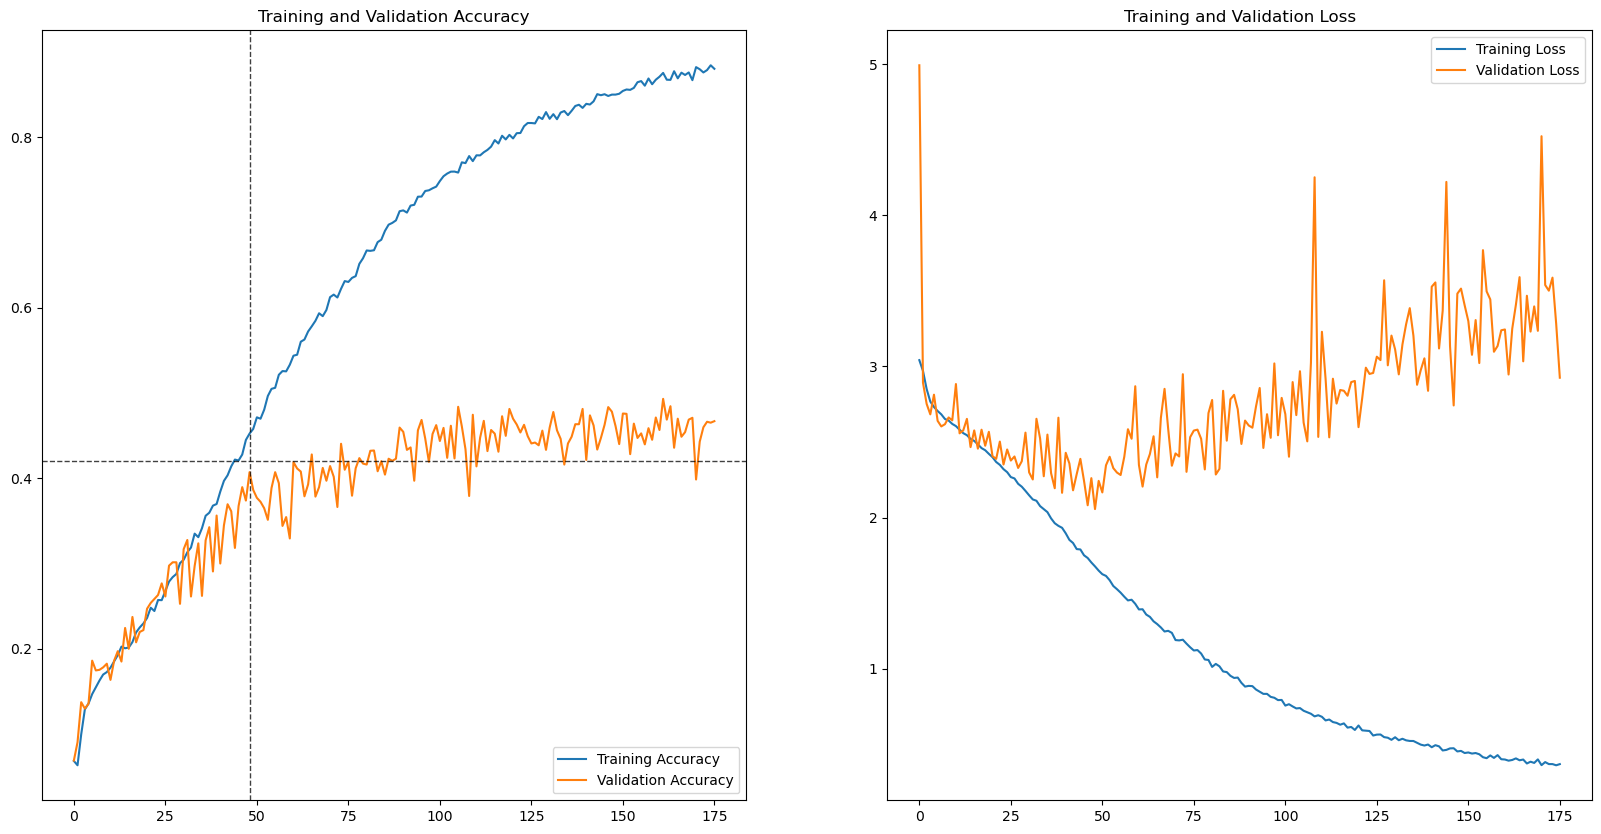

In [34]:
#visualize model performance after 30 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(176)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.axvline(48, color = "black", linestyle = '--', linewidth = 1, alpha = 0.75)
plt.axhline(0.42, color = "black", linestyle = '--', linewidth = 1, alpha = 0.75)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
model.save('BatchNorm_176.h5')

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 160, 160, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)       